In [1]:
# Install the required libraries and import them
# Download Historical data for the ETF SPY (SP500 Index)

import warnings
warnings.filterwarnings('ignore')

try:
    import yfinance as yf
except:
    !pip install -q yfinance
    import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta

df = yf.download('SPY',
                start = date.today() - timedelta(days = 365*10),
                end = date.today(),
                progress = False)

df = df.dropna()
print(df.head()) 

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-07-02  136.479996  136.649994  135.520004  136.509995  112.956642   
2012-07-03  136.479996  137.509995  136.339996  137.410004  113.701309   
2012-07-05  136.899994  137.800003  136.289993  136.789993  113.188316   
2012-07-06  135.470001  135.770004  134.850006  135.490005  112.112625   
2012-07-09  135.380005  135.570007  134.699997  135.320007  111.971962   

               Volume  
Date                   
2012-07-02  129524500  
2012-07-03   80450000  
2012-07-05  126177500  
2012-07-06  151192100  
2012-07-09  103780500  


<AxesSubplot:xlabel='Date'>

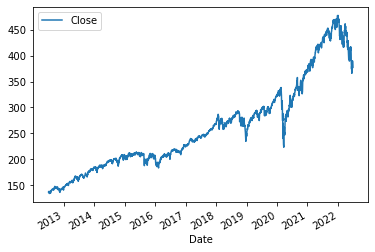

In [2]:
df.plot(y='Close')

## Basic Metrics Analysis 1 : Returns Analysis

In [3]:
# Returns are calculated as tomorrow's opening minus today's opening price 
df['Returns'] = df['Open'].shift(-1)/ df['Open'] 

# Mean and std.dev of returns
mean_returns = df['Returns'].mean()
print('Mean return of SPY (daily) = ', mean_returns) # 0.04 %

std_dev = df["Returns"].std()
print('Mean Return of SPY + 1Std.Dev: ', mean_returns + std_dev) # 0 to 1.04%
print('Mean Return of SPY - 1Std.Dev: ', mean_returns - std_dev) # 0 to -0.9904%

Mean return of SPY (daily) =  1.0004540242294357
Mean Return of SPY + 1Std.Dev:  1.0104963867613452
Mean Return of SPY - 1Std.Dev:  0.9904116616975263


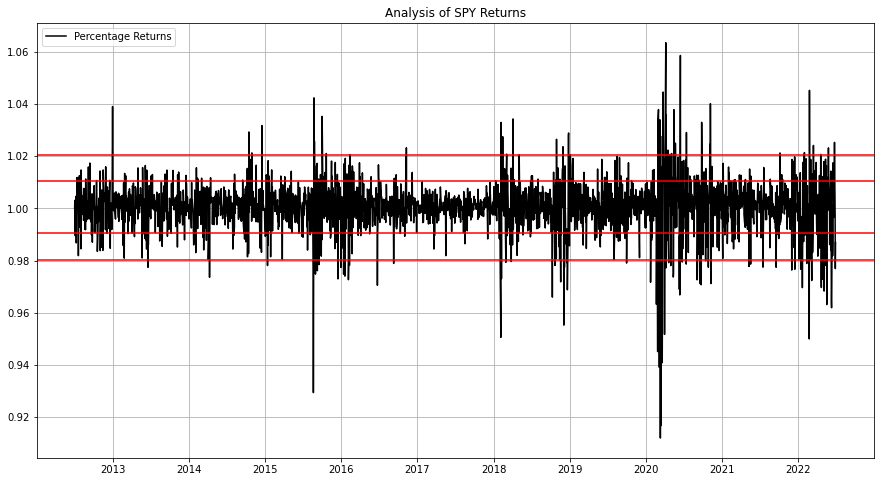

'\nFrom below image, it is clear, the market was less volatile in 2017-2018, but volatility increased a lot in 2020 onwards\n'

In [4]:
# Advanced plot
plt.figure(figsize = (15,8))
plt.title('Analysis of SPY Returns')
plt.plot(df['Returns'], color='black',label='Percentage Returns')

# Between -1 and 1 std.dev, it can be considered as a normal day in the market.
# Anything above 2 or Below -2 std.dev can be considered as highly volatile environment.
# adding horizotal lines at 1&2 std_dev to see the plot clearly

plt.axhline(y=mean_returns + (std_dev*1), color='red', linestyle='-')  
plt.axhline(y=mean_returns + (std_dev*2), color='red', linestyle='-')  
plt.axhline(y=mean_returns - (std_dev*1), color='red', linestyle='-')  
plt.axhline(y=mean_returns - (std_dev*2), color='red', linestyle='-')  
plt.legend(loc='upper left')
plt.grid()
plt.show()

'''
From below image, it is clear, the market was less volatile in 2017-2018, but volatility increased a lot in 2020 onwards
'''

## Basic Metrics Analysis 2 : Returns Distribution

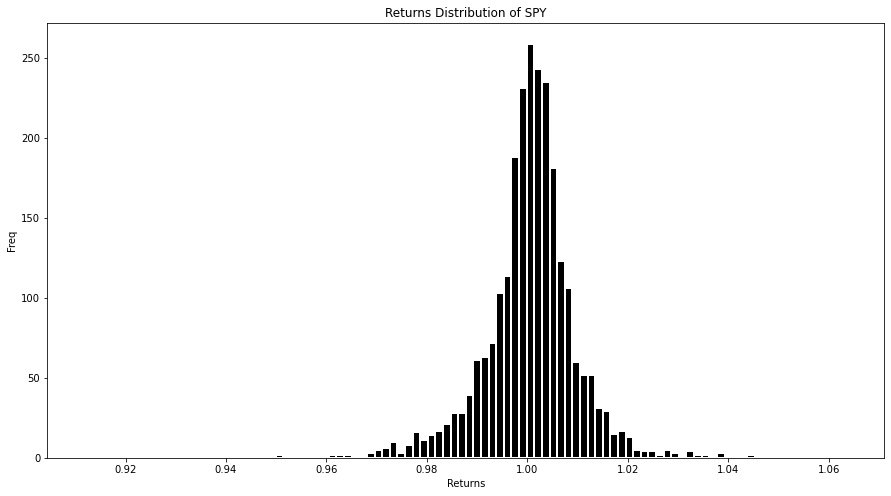

' \nFinantial markets are known to have a flat tail.\nMost frequent returns are the ones which have lowest std dev.\nless frequent have less returns.\n'

In [5]:
plt.figure(figsize = (15,8))
plt.hist(df['Returns'], color='black',edgecolor='white',linewidth=2, bins=100)
plt.title('Returns Distribution of SPY')
plt.xlabel('Returns', fontsize=10)
plt.ylabel('Freq', fontsize=10)
plt.show()

''' 
Finantial markets are known to have a flat tail.
Most frequent returns are the ones which have lowest std dev.
less frequent have less returns.
'''

## Basic Metrics Analysis 3 : Volatility Scenarios

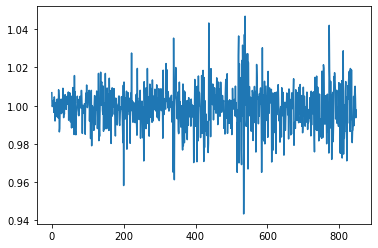

Average next return on High volatility scenarios is:  0.998872400463551
Average next return on Low volatility scenarios is:  1.0008156456368091


In [6]:
df['Volatility'] = df['High']/ df['Low']

high_volatility = np.where(df['Volatility'].shift(-1).ge(df['Volatility'].mean()), df['Close']/df['Open'],0)
high_volatility = high_volatility[high_volatility !=0]

plt.plot(high_volatility)
plt.show()

print('Average next return on High volatility scenarios is: ',np.mean(high_volatility))

low_volatility = np.where(df['Volatility'].shift(-1).lt(df['Volatility'].mean()), df['Close']/df['Open'],0)
low_volatility = low_volatility[low_volatility !=0]

print('Average next return on Low volatility scenarios is: ',np.mean(low_volatility))

# Technical Analysis Indicator

<AxesSubplot:xlabel='Date'>

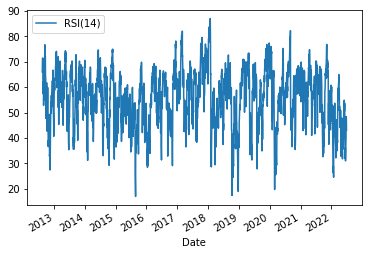

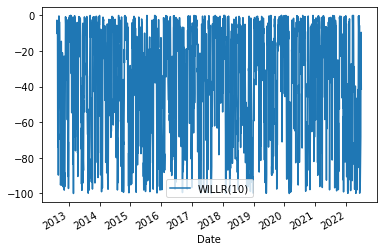

In [7]:
try:
    import pandas_ta as ta
except:
    !pip install -q pandas_ta
    import pandas_ta as ta

df['RSI(2)'] = ta.rsi(close=df['Close'],length=2)
df['RSI(14)'] = ta.rsi(close=df['Close'],length=14)
df['Close / Moving Average(14)'] = df['Close'] / ta.sma(close=df['Close'],length=14)
df['Close / Moving Average(30)'] = df['Close'] / ta.sma(close=df['Close'],length=30)
df['WILLR(10)'] = ta.willr(high = df["High"],low = df['Low'],close=df['Close'],length =10)

df = df.dropna()

# Simple plots of Indicators
df.plot(y="RSI(14)")
df.plot(y='WILLR(10)') 


# Simple Backtest 

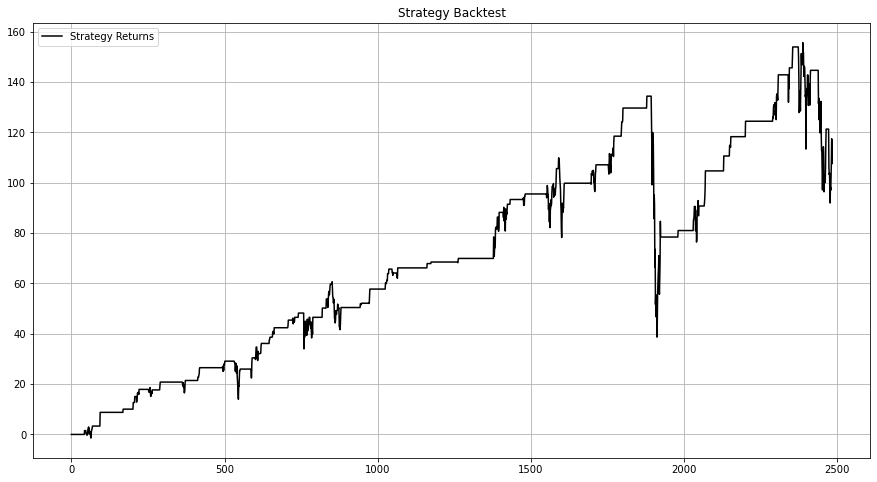

In [8]:
my_strategy = np.where( (df['RSI(14)'].lt(60)) & (df['Close / Moving Average(30)'].lt(0.99)), df['Open'].shift(-2) - df['Open'].shift(-1),0 )
plt.figure(figsize=(15,8))
plt.title("Strategy Backtest")
plt.plot(np.cumsum(my_strategy), color='black',label='Strategy Returns')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

# Correlation Analysis

Correlation between SPY and TLT:  0.5978066092275381


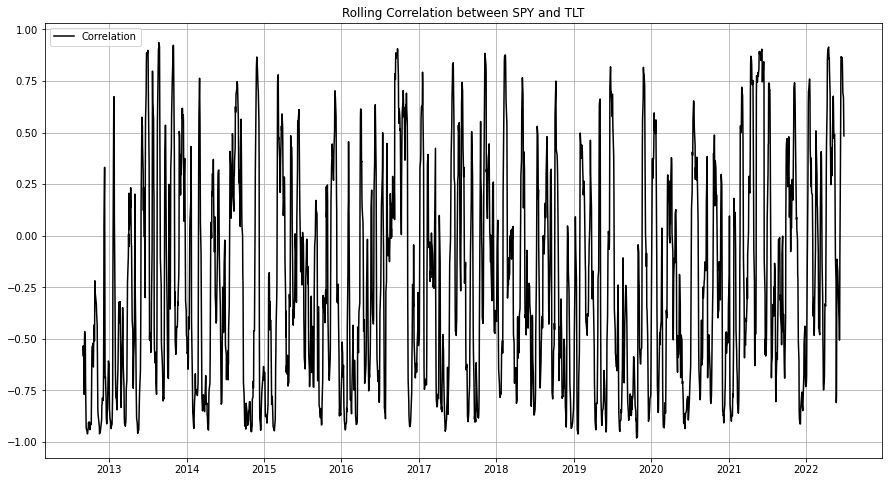

In [9]:
# Corr analysis for SPY TLT

df2 = yf.download('TLT',
                start = date.today() - timedelta(days = 365*10),
                end = date.today(),
                progress = False)

print('Correlation between SPY and TLT: ',df['Close'].corr(df2["Close"]))

df['Rolling Corr 14'] = df["Close"].rolling(14).corr(df2['Close'])
df = df.dropna()

plt.figure(figsize=(15,8))
plt.title('Rolling Correlation between SPY and TLT')
plt.plot(df["Rolling Corr 14"],color='black', label="Correlation")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [10]:
# Trading Strategy for SPY using the rolling correlation between SPY and TLT

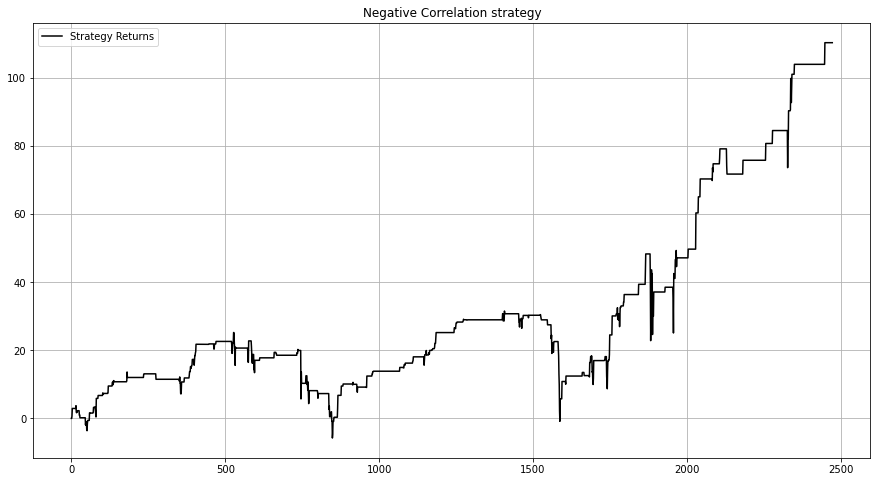

In [11]:
my_strategy = np.where(df['Rolling Corr 14'].lt(-0.6) & df['RSI(2)'].lt(50), df['Open'].shift(-2) - df["Open"].shift(-1),0)

plt.figure(figsize=(15,8))
plt.title('Negative Correlation strategy')
plt.plot(np.cumsum(my_strategy),color='black', label="Strategy Returns")
plt.legend(loc = 'upper left')
plt.grid()
plt.show()